# Homework 4

**Estudiante:**
* Dayana Valentina Gonzalez Vargas

### Librerias


In [192]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import lambdify



1. One way to define a system of coordinates for the sphere $S^{2}$, given by $x^{2}+y^{2}+z^{2}=1 $, is to consider the so-called **stereographic projection** $\pi = S^{2}|\{N\}\longrightarrow R^{2} $ which carries a point $p = (x, y, z)$ of the sphere $S^{2}$ minus the north pole $\{N\}=(0,0,1)$ onto the intersection of the xy plane with the straight line which connects $N$ to $p$.

Let $(X, Y ) = π(x, y, z)$, where $(x, y, z) ∈ S^2|\{N\}$ and $(X, Y ) ∈ xy$ plane (see the figure).

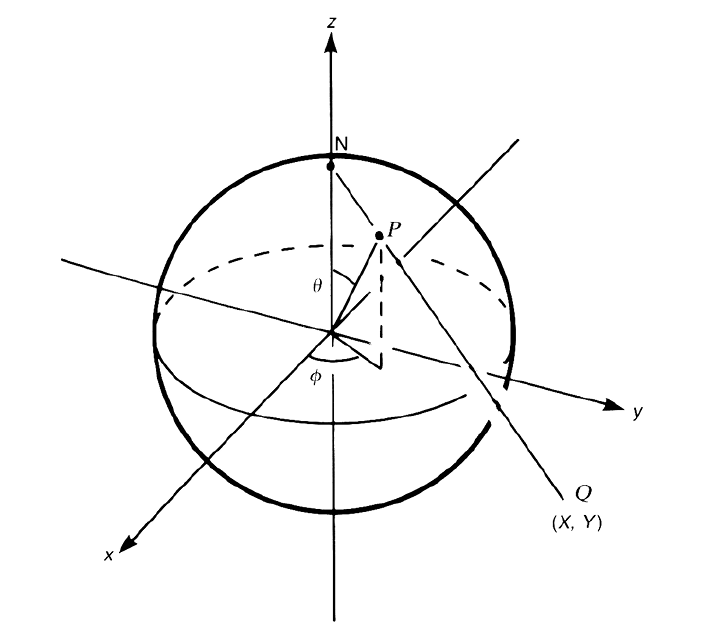

* Show that $π : S^{2}|\{N\} → R^{2}$ is given by

$$X = \frac{x}{1-z}, Y= \frac{y}{1-z}$$

* Show that it is possible, using stereographic projection, to cover the sphere with two
coordinate neighborhoods.

* If the sphere $S^{2}$ is parametrized by polar coordinates
$$\vec{x}(\theta,\phi) = (sin\theta cos\phi,sin\theta sin\phi, cos\theta )$$
Verify that polar and stereographic coordinates are related by
$$X = cot(\frac{\theta}{2}) cos \phi, Y= cot(\frac{\theta}{2}) sin \phi$$

2. Consider the parametrization for the ellipsoid
$$\vec{x}(\theta,\phi) = (a sin\theta cos\phi,b sin\theta sin\phi,c cos\theta)$$

In [193]:
# Defino como variables que van a obtener datos
theta,phi,a,b,c = sp.symbols('theta, phi,a,b,c', reals = True, positive = True)
N,dx_theta,dx_phi,x,y,z = sp.symbols("N,dx_theta,dx_phi,x,y,z", cls = sp.Function)

In [194]:
x = (a*sp.sin(theta))*sp.cos(phi)
y = (b*sp.sin(theta))*sp.sin(phi)
z = c*sp.cos(theta)
print(r"\vec{x}(\theta,\phi) =",(x,y,z))

\vec{x}(\theta,\phi) = (a*sin(theta)*cos(phi), b*sin(phi)*sin(theta), c*cos(theta))


* Evaluate the first fundamental form for the ellipsoid.

Calculo las derivadas con respecto a $\theta$ y respecto a $\phi$

$$\vec{X}_{\theta} =(acos(\phi)cos(\theta), bsin(\phi)cos(\theta), -csin(\theta)) $$
$$\vec{X}_{\phi} = (-asin(\phi)sin(\theta), bsin(\theta)cos(\phi), 0)$$

In [195]:
# Se Contriye el mapeo
dX = [[sp.diff(x,theta), sp.diff(x,phi)], [sp.diff(y,theta), sp.diff(y,phi)],[sp.diff(z,theta), sp.diff(z,phi)]]
print('dX =', dX)

dX = [[a*cos(phi)*cos(theta), -a*sin(phi)*sin(theta)], [b*sin(phi)*cos(theta), b*sin(theta)*cos(phi)], [-c*sin(theta), 0]]


In [196]:
dx_theta = np.matmul(dX, [1,0])
print(r"dX/d\theta", dx_theta)

dX/d\theta [a*cos(phi)*cos(theta) b*sin(phi)*cos(theta) -c*sin(theta)]


In [197]:
dx_phi = np.matmul(dX, [0,1])
print(r"dX/d\phi", dx_phi)

dX/d\phi [-a*sin(phi)*sin(theta) b*sin(theta)*cos(phi) 0]


Obtenemos los coeficientes de la primera forma fundamental: 
$$E(\theta,\phi) = < X_{\theta}, X_{\theta} > $$
$$F(\theta,\phi) = < X_{\theta}, X_{\phi} > $$
$$G(\theta,\phi) = < X_{\phi}, X_{\phi} > $$

In [198]:
E = np.dot(dx_theta, dx_theta).simplify()
print(r'E(\theta,\phi)=',E)

E(\theta,\phi)= a**2*cos(phi)**2*cos(theta)**2 + b**2*sin(phi)**2*cos(theta)**2 + c**2*sin(theta)**2


In [199]:
F = np.dot(dx_theta, dx_phi).simplify()
print(r'F(\theta,\phi)=',F)

F(\theta,\phi)= (-a**2 + b**2)*(cos(2*phi - 2*theta) - cos(2*phi + 2*theta))/8


In [200]:
G = np.dot(dx_phi, dx_phi).simplify()
print(r'F(\theta,\phi)=', G)

F(\theta,\phi)= (a**2*sin(phi)**2 + b**2*cos(phi)**2)*sin(theta)**2


* Evaluate the metric tensor for the ellipsoid. Remember, the coeficients of the first
fundamental form are E, F and G, and the metric tensor is given by

$$g = 
\begin{pmatrix}
E & F \\
F & G 
\end{pmatrix}
$$

In [201]:
g = sp.Matrix([[E,F],[F,G]])
g

Matrix([
[a**2*cos(phi)**2*cos(theta)**2 + b**2*sin(phi)**2*cos(theta)**2 + c**2*sin(theta)**2, (-a**2 + b**2)*(cos(2*phi - 2*theta) - cos(2*phi + 2*theta))/8],
[                      (-a**2 + b**2)*(cos(2*phi - 2*theta) - cos(2*phi + 2*theta))/8,            (a**2*sin(phi)**2 + b**2*cos(phi)**2)*sin(theta)**2]])

In [202]:
g.det().simplify()

-a**2*b**2*sin(theta)**4 + a**2*b**2*sin(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**4 - b**2*c**2*sin(phi)**2*sin(theta)**4 + b**2*c**2*sin(theta)**4

* Which is the area element $|\vec{X}_{u} \times \vec{X}_{v}|$ for the ellipsoid?

$$|\vec{X}_{u} \times \vec{X}_{v}| = \sqrt{EG-F^2}$$

In [203]:
dA = sp.sqrt(E*G-F**2).simplify()
dA

sqrt(-a**2*b**2*sin(theta)**2 + a**2*b**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2)*Abs(sin(theta))

* Evaluate the total area for the ellipsoid as
$$\int \int_{Q} |\vec{X}_{u} \times \vec{X}_{v}| dudv$$

In [204]:
sp.integrate(dA, (theta,0,sp.pi), (phi,0,2*sp.pi))

Integral(sqrt(-a**2*b**2*sin(theta)**2 + a**2*b**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2)*sin(theta), (theta, 0, pi), (phi, 0, 2*pi))

* Evaluate the second fundamental form for the ellipsoid.
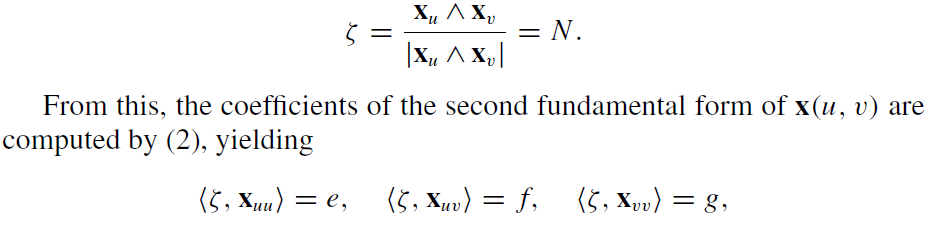
Imagen tomada del libro: [3] Differential-Geometry-of-Curves-Surfaces

In [205]:
## Definimos la norma 
def norma(x):
  return sp.sqrt(np.dot(x,x)).simplify()

In [206]:
# Vector normal unitario
zi = np.cross(dx_theta,dx_phi)/norma(np.cross(dx_theta,dx_phi))
zi

array([b*c*sin(theta)**2*cos(phi)/(sqrt(a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*Abs(sin(theta))),
       a*c*sin(phi)*sin(theta)**2/(sqrt(a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*Abs(sin(theta))),
       (a*b*sin(phi)**2*sin(theta)*cos(theta) + a*b*sin(theta)*cos(phi)**2*cos(theta))/(sqrt(a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*Abs(sin(theta)))],
      dtype=object)

In [207]:
# segundas derivadas
ddx_theta = (sp.diff(dx_theta[0],theta),sp.diff(dx_theta[1],theta),sp.diff(dx_theta[2],theta))
ddx_theta_phi = (sp.diff(dx_theta[0],phi),sp.diff(dx_theta[1],phi),sp.diff(dx_theta[2],phi))
ddx_phi =(sp.diff(dx_phi[0],phi),sp.diff(dx_phi[1],phi),sp.diff(dx_phi[2],phi))
print('d2X_theta = ',ddx_theta)
print('d2X_theta_phi = ',ddx_theta_phi)
print('d2X_phi = ',ddx_phi)

d2X_theta =  (-a*sin(theta)*cos(phi), -b*sin(phi)*sin(theta), -c*cos(theta))
d2X_theta_phi =  (-a*sin(phi)*cos(theta), b*cos(phi)*cos(theta), 0)
d2X_phi =  (-a*sin(theta)*cos(phi), -b*sin(phi)*sin(theta), 0)


In [208]:
e = np.dot(zi, ddx_theta).simplify()
e

-a*b*c*sin(theta)/(sqrt(a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*Abs(sin(theta)))

In [209]:
f = np.dot(zi, ddx_theta_phi).simplify()
f

0

In [210]:
g2 = np.dot(zi, ddx_phi).simplify()
g2

-a*b*c*sin(theta)**3/(sqrt(a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*Abs(sin(theta)))

* Consider a point $q ∈ U$. Evaluate the normal vector on the surface at $p = \vec{X}(q) ∈\vec{X}(U)$ given by
$$\vec{N} = \frac{\vec{X}_\theta \times \vec{X}_\phi }{|\vec{X}_\theta \times \vec{X}_\phi|} (p)$$

In [211]:
N = np.cross(dx_theta,dx_phi)/norma(np.cross(dx_theta,dx_phi))
N

array([b*c*sin(theta)**2*cos(phi)/(sqrt(a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*Abs(sin(theta))),
       a*c*sin(phi)*sin(theta)**2/(sqrt(a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*Abs(sin(theta))),
       (a*b*sin(phi)**2*sin(theta)*cos(theta) + a*b*sin(theta)*cos(phi)**2*cos(theta))/(sqrt(a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*Abs(sin(theta)))],
      dtype=object)

* Plot the surface identifying the point p and the vectors $\vec{X}ϕ, \vec{X}θ$ and $\hat{N}$ in the same
point. For this plot use the parameters $a = 3, b = 2$ and $c = 1$.

In [212]:
thetads = np.linspace

3. Consider the parametrization for the Möbius strip

$$\vec{x}(\theta,t) = ((1+\frac{1}{2} t cos\theta)cos\theta,(1+\frac{1}{2} t cos\theta)sin\theta,\frac{1}{2} t sin\frac{\theta}{2})$$

for

$$U = \{(θ, t) ∈ R^{2}| − 0.25 < t < 0.25, 0 < θ < 2π\}$$


In [213]:
theta,t = sp.symbols('theta,t', reals = True, positive = True)
N,dx_theta,dx_t,x,y,z = sp.symbols("N,dx_theta,dx_t,x,y,z", cls = sp.Function)

In [214]:
x = (1+(1/2)*t*sp.cos(theta))*sp.cos(theta)
y = (1+(1/2)*t*sp.cos(theta))*sp.sin(theta)
z = (1/2)*t*sp.sin(theta/2)
print(r"\vec{x}(\theta,t) =",(x,y,z))

\vec{x}(\theta,t) = ((0.5*t*cos(theta) + 1)*cos(theta), (0.5*t*cos(theta) + 1)*sin(theta), 0.5*t*sin(theta/2))



* Evaluate the first fundamental form for the Möbius strip

$$\vec{X}_{\theta} =((-1.0tcos(\theta) - 1.0)sin(\theta)
 , -1.0tsin(\theta)^{2} + 0.5t + 1.0cos(\theta), 0.25tcos(\frac{\theta}{2})) $$
$$\vec{X}_{t} = (0.5*cos(\theta)^{2}, 0.25sin(2\theta), 0.5sin(\frac{\theta}{2}))$$

In [215]:
# Se Contriye el mapeo
dX = [[sp.diff(x,theta).simplify(), sp.diff(x,t).simplify()], [sp.diff(y,theta).simplify(), sp.diff(y,t).simplify()],[sp.diff(z,theta).simplify(), sp.diff(z,t).simplify()]]
print('dX =', dX)

dX = [[(-1.0*t*cos(theta) - 1.0)*sin(theta), 0.5*cos(theta)**2], [-1.0*t*sin(theta)**2 + 0.5*t + 1.0*cos(theta), 0.25*sin(2*theta)], [0.25*t*cos(theta/2), 0.5*sin(theta/2)]]


In [216]:
dx_theta = np.matmul(dX, [1,0])
print(r"dX/d\theta = ", dx_theta)

dX/d\theta =  [(-1.0*t*cos(theta) - 1.0)*sin(theta)
 -1.0*t*sin(theta)**2 + 0.5*t + 1.0*cos(theta) 0.25*t*cos(theta/2)]


In [217]:
dx_t = np.matmul(dX, [0,1])
print(r"dX/dt= ", dx_t)

dX/dt=  [0.5*cos(theta)**2 0.25*sin(2*theta) 0.5*sin(theta/2)]


Obtenemos los coeficientes de la primera forma fundamental: 
$$E(\theta,t) = < X_{\theta}, X_{\theta} > $$
$$F(\theta,t) = < X_{\theta}, X_{t} > $$
$$G(\theta,t) = < X_{t}, X_{t} > $$

In [218]:
E = np.dot(dx_theta, dx_theta).simplify()
print(r'E(\theta,t)=',E)

E(\theta,t)= -0.0625*t**2*sin(theta/2)**2 + 0.3125*t**2 + 1.0*t*cos(theta) + 1.0


In [219]:
F = np.dot(dx_theta, dx_t).simplify()
print(r'F(\theta,t)=',F)

F(\theta,t)= t*(0.0625*sin(theta) - 0.125*sin(2*theta))


In [220]:
G = np.dot(dx_t, dx_t).simplify()
print(r'G(\theta,t)=',G)

G(\theta,t)= -0.125*cos(theta) + 0.125*cos(2*theta) + 0.25


* Evaluate the metric tensor for the Möbius strip.
$$g = 
\begin{pmatrix}
E & F \\
F & G 
\end{pmatrix}
$$

In [221]:
g = sp.Matrix([[E,F],[F,G]])
g

Matrix([
[-0.0625*t**2*sin(theta/2)**2 + 0.3125*t**2 + 1.0*t*cos(theta) + 1.0,    t*(0.0625*sin(theta) - 0.125*sin(2*theta))],
[                         t*(0.0625*sin(theta) - 0.125*sin(2*theta)), -0.125*cos(theta) + 0.125*cos(2*theta) + 0.25]])

In [222]:
g.det().simplify()

0.015625*t**2*cos(theta/2)**2*cos(theta)**2 - 0.0078125*t**2*cos(theta/2)**2*cos(theta) + 0.0078125*t**2*cos(theta/2)**2 + 0.0625*t**2*cos(theta)**4 - 0.03125*t**2*cos(theta)**3 + 0.00390625*t**2*cos(theta)**2 + 0.02734375*t**2 + 0.25*t*cos(theta)**3 - 0.125*t*cos(theta)**2 + 0.125*t*cos(theta) + 0.25*cos(theta)**2 - 0.125*cos(theta) + 0.125

* Which is the area element $|\vec{X}_{u} \times \vec{X}_{v}|$ for the Möbius strip?

$$|\vec{X}_{u} \times \vec{X}_{v}| = \sqrt{EG-F^2}$$

In [223]:
dA = sp.sqrt(E*G-F**2).simplify()
dA

sqrt(-0.015625*t**2*(0.5*sin(theta) - sin(2*theta))**2 + (-0.125*cos(theta) + 0.125*cos(2*theta) + 0.25)*(-0.0625*t**2*sin(theta/2)**2 + 0.3125*t**2 + 1.0*t*cos(theta) + 1.0))

* Evaluate the total area for Möbius strip as
$$\int \int_{Q} |\vec{X}_{u} \times \vec{X}_{v}| dudv$$
If the analytical calculation is not possible, implement some numerical method.
Describe the procedure you implemented.

In [225]:
sp.integrate(dA, (theta,0,2*sp.pi), (t,-0.25,0.25))

KeyboardInterrupt: 

* Obtain the normal vector as a function of the coordinates $(θ, t)$
$$\vec{N} = \frac{\vec{X}_\theta \times \vec{X}_t }{|\vec{X}_\theta \times \vec{X}_t|}$$

In [ ]:
N = np.cross(dx_theta,dx_t)/norma(np.cross(dx_theta,dx_t))
N

array([2.0*(-0.0625*t*sin(2*theta)*cos(theta/2) + 0.5*(-1.0*t*sin(theta)**2 + 0.5*t + 1.0*cos(theta))*sin(theta/2))/sqrt((0.5*t*cos(theta) + 1.0)**2*cos(theta)**2 + (0.125*t*sin(2*theta)*cos(theta/2) - (-1.0*t*sin(theta)**2 + 0.5*t + 1.0*cos(theta))*sin(theta/2))**2 + (0.25*t*cos(theta/2)*cos(theta)**2 + 1.0*(t*cos(theta) + 1)*sin(theta/2)*sin(theta))**2),
       2.0*(0.125*t*cos(theta/2)*cos(theta)**2 - 0.5*(-1.0*t*cos(theta) - 1.0)*sin(theta/2)*sin(theta))/sqrt((0.5*t*cos(theta) + 1.0)**2*cos(theta)**2 + (0.125*t*sin(2*theta)*cos(theta/2) - (-1.0*t*sin(theta)**2 + 0.5*t + 1.0*cos(theta))*sin(theta/2))**2 + (0.25*t*cos(theta/2)*cos(theta)**2 + 1.0*(t*cos(theta) + 1)*sin(theta/2)*sin(theta))**2),
       2.0*(0.25*(-1.0*t*cos(theta) - 1.0)*sin(theta)*sin(2*theta) - 0.5*(-1.0*t*sin(theta)**2 + 0.5*t + 1.0*cos(theta))*cos(theta)**2)/sqrt((0.5*t*cos(theta) + 1.0)**2*cos(theta)**2 + (0.125*t*sin(2*theta)*cos(theta/2) - (-1.0*t*sin(theta)**2 + 0.5*t + 1.0*cos(theta))*sin(theta/2))**2 + (0.25

* Evaluate the normal vector at $t = 0$ and obtain the limits
$$\lim_{\theta \to 0} \hat{N}(\theta,0)$$
$$\lim_{\theta \to 2\pi} \hat{N}(\theta,0)$$

What do you conclude from your calculations? Is the surface orientable?

In [ ]:
N[0].subs(t,0)

1.0*sin(theta/2)*cos(theta)/sqrt(1.0*sin(theta/2)**2*sin(theta)**2 + 1.0*sin(theta/2)**2*cos(theta)**2 + 1.0*cos(theta)**2)